In [66]:
# Standard import(s)
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

## Preamble
---

In [1]:
# Keras import(s)
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.layers import Input, Dense, Dropout, Flatten, Reshape, Conv2D, Conv2DTranspose, Concatenate, Lambda,BatchNormalization, UpSampling2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.losses import binary_crossentropy
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.python.keras.backend import set_image_data_format
from tensorflow.keras.optimizers import Adam

set_image_data_format('channels_last')  # Images are formatted as (N, N, 1), with colour-channels last


# Dense AE

In [68]:
# Load in MNIST dataset 
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/x_train.max() # Normalise data so pixel values are between 0 and 1

x_train = x_train[:,:,:,np.newaxis] # Add a new axis to the end. This axis is used to specifiy the RGB channel, however, we are working with greyscale images here.
x_test  = x_test [:,:,:,np.newaxis]
input_shape = x_train.shape[1:]
n_classes   = 10 # we have 10 different classes, ie 10 integers from 0 to 9
latent_dim = 30

In [69]:
# Encoder
inputs = Input(shape=input_shape, name='input')
x = Flatten()(inputs)
x = Dense(64, activation='relu')(x)
encoded = Dense(latent_dim, activation='relu')(x)
encoder = Model(inputs, encoded, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_28 (Dense)             (None, 30)                1950      
Total params: 52,190
Trainable params: 52,190
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Decoder
decoder_input = Input(shape=(latent_dim,))
decoded = Dense(np.prod(input_shape), activation='relu')(decoder_input)
decoded = Reshape(input_shape)(decoded)
decoder = Model(decoder_input, decoded, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 30)]              0         
_________________________________________________________________
dense_29 (Dense)             (None, 784)               24304     
_________________________________________________________________
reshape_9 (Reshape)          (None, 28, 28, 1)         0         
Total params: 24,304
Trainable params: 24,304
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Autoencoder
o = decoder(encoder(inputs))
vae = Model(encoder.inputs, o, name = 'vae')
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 30)                52190     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         24304     
Total params: 76,494
Trainable params: 76,494
Non-trainable params: 0
_________________________________________________________________


In [72]:
vae.compile(optimizer='adam', loss='binary_crossentropy')

In [73]:
vae_history = vae.fit(x_train, x_train, epochs=30, batch_size=256)

Epoch 1/30
235/235 [==============================] - 1s 5ms/step - loss: 0.3841
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2722
Epoch 3/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2656
Epoch 4/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2502
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2442
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2342
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2142
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2080
Epoch 9/30
235/235 [==============================] - 1s 5ms/step - loss: 0.2026
Epoch 10/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2051
Epoch 11/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1981
Epoch 12/30
235/235 [==============================] - 1s 4ms/step - loss: 0.2168
Epoch 13/30
235/235 [====

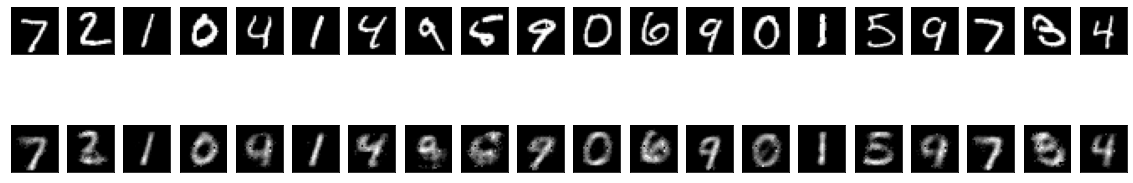

In [74]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()